In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

CIFAR-10数据集包含10个类别，每个类别有6000张图片，每张照片大小为32*32，颜色为RGB。

In [2]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

BATCH_SIZE = 128
EPOCHS = 30
CLASSES = 10
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.Adam()

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize
mean = np.mean(x_train, axis=(0, 1, 2, 3))
std = np.std(x_train, axis=(0, 1, 2, 3))
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

In [63]:
def build(input_shape, classes):
    model = models.Sequential()
    # 卷积层
    model.add(layers.Convolution2D(32, (3, 3), activation='relu', input_shape=input_shape))
    # 池化层
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    # 失活层
    model.add(layers.Dropout(0.25))
    # 稠密网络
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [64]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./CIFAR-10/logs', histogram_freq=1)]

In [83]:
model = build(input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS), classes=CLASSES)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.fit(x_train, y_train, 
          batch_size=BATCH_SIZE,
          epochs=EPOCHS, 
          validation_split=VALIDATION_SPLIT, 
          callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 21s 65ms/step - loss: 12.1041 - accuracy: 0.1170 - val_loss: 2.2941 - val_accuracy: 0.1135
Epoch 2/30
313/313 [==============================] - 20s 63ms/step - loss: 2.2605 - accuracy: 0.1375 - val_loss: 2.2696 - val_accuracy: 0.1367
Epoch 3/30
313/313 [==============================] - 20s 63ms/step - loss: 2.2162 - accuracy: 0.1640 - val_loss: 2.2314 - val_accuracy: 0.1609
Epoch 4/30
313/313 [==============================] - 20s 63ms/step - loss: 2.1567 - accuracy: 0.1890 - val_loss: 2.1776 - val_accuracy: 0.1898
Epoch 5/30
313/313 [==============================] - 20s 64ms/step - loss: 2.0816 - accuracy: 0.2256 - val_loss: 2.0935 - val_accuracy: 0.2252
Epoch 6/30
313/313 [==============================] - 20s 65ms/step - loss: 1.9995 - accuracy: 0.2605 - val_loss: 2.0573 - val_accuracy: 0.2467
Epoch 7/30
313/313 [==============================] - 20s 63ms/step - loss: 1.9005 - accuracy: 0.3011 - val_loss: 1.9637 - val_accuracy

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2451163530349731
Test accuracy: 0.5687999725341797


In [8]:
# 模型保存
model.save('./CIFAR-10/save/CIFAR-10_1.h5')

In [4]:
# 模型加载
model = tf.keras.models.load_model('./CIFAR-10/save/CIFAR-10_1.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 512)               3686912   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

使用更深的网络提高CIFAE-10的性能

In [9]:
def build_more():
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    model.add(layers.BatchNormalization())
    model.add(layers.Convolution2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Convolution2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Convolution2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Convolution2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Convolution2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.4))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [10]:
model_more1 = build_more()
model_more1.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
batch_size = 64
model_more1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [11]:
EPOCHS = 30
model_more1.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=EPOCHS,
               validation_data=(x_test, y_test),)

Epoch 1/30
782/782 [==============================] - 214s 272ms/step - loss: 1.7717 - accuracy: 0.4793 - val_loss: 1.7164 - val_accuracy: 0.4969
Epoch 2/30
782/782 [==============================] - 230s 294ms/step - loss: 1.1818 - accuracy: 0.6469 - val_loss: 0.9960 - val_accuracy: 0.6880
Epoch 3/30
782/782 [==============================] - 227s 290ms/step - loss: 0.9589 - accuracy: 0.7034 - val_loss: 1.0014 - val_accuracy: 0.6679
Epoch 4/30
782/782 [==============================] - 221s 283ms/step - loss: 0.8277 - accuracy: 0.7358 - val_loss: 0.9029 - val_accuracy: 0.6920
Epoch 5/30
782/782 [==============================] - 184s 236ms/step - loss: 0.7183 - accuracy: 0.7611 - val_loss: 0.8557 - val_accuracy: 0.7193
Epoch 6/30
782/782 [==============================] - 151s 194ms/step - loss: 0.6427 - accuracy: 0.7805 - val_loss: 0.9621 - val_accuracy: 0.6943
Epoch 7/30
782/782 [==============================] - 152s 194ms/step - loss: 0.5903 - accuracy: 0.7986 - val_loss: 0.6973 -

In [9]:
score = model_more1.evaluate(x_test, y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

157/157 [==============================] - 7s 39ms/step - loss: 0.5152 - accuracy: 0.8480
Test loss: 0.5151849389076233
Test accuracy: 0.8479999899864197


In [13]:
model_more1.save('./CIFAR-10/save/CIFAR-10_2.h5')

In [8]:
# 模型加载
batch_size = 64
model_more1 = tf.keras.models.load_model('./CIFAR-10/save/CIFAR-10_2.h5')
model_more1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [14]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(x_train)

In [17]:
batch_size = 64
model_more2 = build_more()
model_more2.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model_more2.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    workers=4)

Epoch 1/30
781/781 [==============================] - 163s 208ms/step - loss: 1.0347 - accuracy: 0.6493 - val_loss: 1.2310 - val_accuracy: 0.6489
Epoch 8/30
781/781 [==============================] - 158s 202ms/step - loss: 0.9804 - accuracy: 0.6674 - val_loss: 0.8971 - val_accuracy: 0.6944
Epoch 9/30
781/781 [==============================] - 158s 202ms/step - loss: 0.9316 - accuracy: 0.6823 - val_loss: 0.8679 - val_accuracy: 0.7200
Epoch 10/30
781/781 [==============================] - 167s 214ms/step - loss: 0.9060 - accuracy: 0.6884 - val_loss: 0.8613 - val_accuracy: 0.7278
Epoch 11/30
781/781 [==============================] - 159s 203ms/step - loss: 0.8668 - accuracy: 0.7027 - val_loss: 0.8178 - val_accuracy: 0.7310
Epoch 12/30
781/781 [==============================] - 159s 203ms/step - loss: 0.8428 - accuracy: 0.7118 - val_loss: 0.9025 - val_accuracy: 0.7101
Epoch 13/30
781/781 [==============================] - 159s 203ms/step - loss: 0.8237 - accuracy: 0.7157 - val_loss: 0.86

In [50]:
model_json = model_more2.to_json()
with open(".\CIFAR-10\save\model.json", "w") as json_file:
    json_file.write(model_json)
model_more2.save_weights('.\CIFAR-10\save\model.h5')

In [10]:
# 加载模型
json_file = open('.\CIFAR-10\save\model.json', 'r')
loaded_model_json = json_file.read()
model_more2 = tf.keras.models.model_from_json(loaded_model_json)
model_more2.load_weights('.\CIFAR-10\save\model.h5')
model_more2.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])


In [11]:
score = model_more2.evaluate(x_test, y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

157/157 [==============================] - 7s 41ms/step - loss: 0.6274 - accuracy: 0.7965
Test loss: 0.627402126789093
Test accuracy: 0.796500027179718


In [45]:
# 保存模型
model_more2.save('./CIFAR-10/save/CIFAR-10_3.h5')

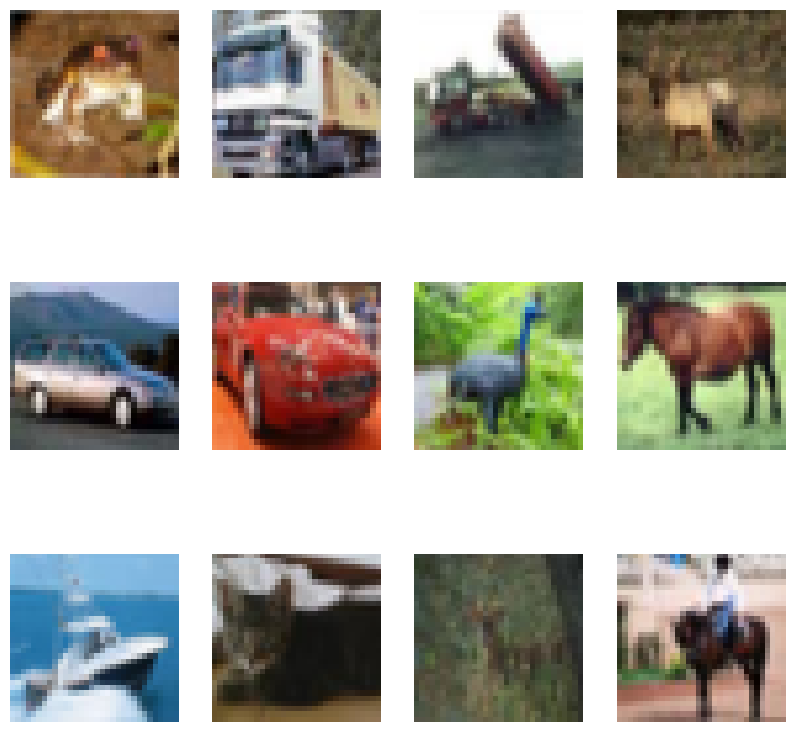

In [27]:
# 可视化CIFAR-10
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# 加载CIFAR-10数据集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 数据预处理：缩放像素值到0-1之间
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 选择前9张图片进行展示
images = x_train[:12]

# 设置画布为3x3网格布局
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3, 4, i + 1)  # 3行3列，第i+1幅图
    plt.imshow(images[i])     # 显示图像
    plt.axis('off')           # 不显示坐标轴
    # 可选：显示图像对应的类别标签
    # plt.title(cifar10_labels[y_train[i][0]])

plt.show()


In [72]:
# 对模型进行预测
predictions = model_more2.predict(x_test)

313/313 [==============================] - 8s 25ms/step


In [74]:
# 输出预测准确率
print(np.sum(np.argmax(predictions, axis=1) == y_test.argmax(axis=1)) / len(y_test))

0.7965


In [75]:
# 显示预测结果
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']# 假设cifar10_labels已定义，deer的索引为2
deer_index = cifar10_labels.index('deer')

# 将预测概率转换为类别预测（例如，取最大概率对应的索引）
predicted_classes = np.argmax(predictions, axis=1)

# 计算非'deer'类别的预测数
non_deer_count = np.sum(predicted_classes != deer_index)
print(non_deer_count)

8950
